In [29]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

In [30]:
Univ = pd.read_excel("./Universities.xlsx")

In [31]:
Univ

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90
5,Dartmouth,1340,89,23,10,32162,95
6,Duke,1315,90,30,12,31585,95
7,Georgetown,1255,74,24,12,20126,92
8,Harvard,1400,91,14,11,39525,97
9,JohnsHopkins,1305,75,44,7,58691,87


In [32]:
# Normalization function 
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()
scaled_Univ_df = scaler.fit_transform(Univ.iloc[:,1:])

In [33]:
scaled_Univ_df

array([[ 0.41028362,  0.6575195 , -0.88986682,  0.07026045, -0.33141256,
         0.82030265],
       [ 1.39925928,  1.23521235, -0.73465749, -1.68625071,  2.56038138,
        -0.64452351],
       [-0.06065717, -0.76045386,  1.02438157, -0.93346022, -0.16712136,
        -1.65863393],
       [ 0.41028362, -0.02520842, -0.78639393, -0.18066972,  0.29164871,
         0.14422904],
       [ 0.12771914,  0.34241431, -0.32076595,  0.07026045, -0.39084607,
         0.36958691],
       [ 0.69284809,  0.6575195 , -0.83813038, -0.68253005,  0.33778044,
         0.93298158],
       [ 0.4573777 ,  0.71003703, -0.47597528, -0.18066972,  0.29695528,
         0.93298158],
       [-0.10775125, -0.13024348, -0.78639393, -0.18066972, -0.51381683,
         0.59494478],
       [ 1.25797704,  0.76255456, -1.30375836, -0.43159988,  0.85874344,
         1.15833946],
       [ 0.36318954, -0.07772595,  0.24833493, -1.43532055,  2.21481798,
         0.0315501 ],
       [ 1.06960072,  0.92010716, -0.47597528, -0.

In [34]:
# How to find optimum number of  cluster
#The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion:

In [35]:
# for i in range(1,4):
#   print(i)


In [40]:
wcss1 = []

kmeans = KMeans(n_clusters=3,random_state=0)

kmeans.fit(scaled_Univ_df)

wcss1.append(kmeans.inertia_)


C:\Users\Divya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Divya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [41]:
wcss1

[44.53176173145097]

In [42]:
kmeans.labels_

array([2, 0, 2, 2, 2, 0, 0, 2, 0, 0, 0, 2, 2, 1, 0, 1, 0, 1, 2, 2, 2, 2,
       2, 1, 0])

In [53]:
kmeans1 = KMeans(n_clusters=4,random_state=43)

kmeans1.fit(scaled_Univ_df)

wcss1.append(kmeans1.inertia_)

C:\Users\Divya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Divya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [54]:
wcss1

[44.53176173145097,
 33.654341806512235,
 33.654341806512235,
 33.654341806512235,
 33.654341806512235]

In [55]:
#kmeans.inertia_   ###sum of all squared distance between each data point and its centroid.

In [56]:
kmeans1.labels_

array([2, 3, 0, 2, 0, 2, 2, 0, 2, 3, 2, 0, 0, 1, 2, 1, 2, 1, 0, 0, 0, 0,
       0, 1, 2])

In [57]:
scaled_Univ = pd.DataFrame(scaled_Univ_df)

In [58]:
scaled_Univ['Cluster_3'] = kmeans.labels_

In [59]:
scaled_Univ.head()

,0,1,2,3,4,5,Cluster_3
0,0.410284,0.657519,-0.889867,0.070260,-0.331413,0.820303,2
1,1.399259,1.235212,-0.734657,-1.686251,2.560381,-0.644524,0
2,-0.060657,-0.760454,1.024382,-0.933460,-0.167121,-1.658634,2
3,0.410284,-0.025208,-0.786394,-0.180670,0.291649,0.144229,2
4,0.127719,0.342414,-0.320766,0.070260,-0.390846,0.369587,2


C:\Users\Divya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Divya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Divya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Divya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

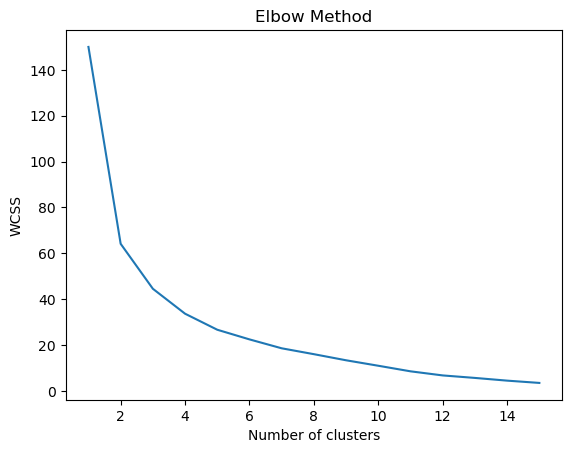

In [60]:
wcss = []

for i in range(1, 16):
    kmeans = KMeans(n_clusters=i,random_state=145)
    kmeans.fit(scaled_Univ_df)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 16), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [19]:
wcss

[150.0,
 64.1452839501027,
 44.531761731450956,
 33.654341806512235,
 27.932875789090364,
 22.704584217335714,
 18.750021301705345,
 16.894939631304872,
 13.267235048457902,
 11.16775066039467,
 8.289582932057128,
 7.114306030131724,
 5.493016111483616,
 4.458973069782968,
 3.6752819611037606]

In [61]:
#Build Cluster algorithm
from sklearn.cluster import KMeans

clusters_new = KMeans(4, random_state=42)

clusters_new.fit(scaled_Univ_df)

C:\Users\Divya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Divya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [21]:
clusters_new.labels_

array([1, 3, 2, 1, 2, 1, 1, 2, 1, 3, 1, 2, 2, 0, 1, 0, 1, 0, 2, 2, 2, 2,
       2, 0, 1])

In [62]:
#Assign clusters to the data set
Univ['clusterid_new'] = clusters_new.labels_

In [23]:
Univ

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,clusterid_new
0,Brown,1310,89,22,13,22704,94,1
1,CalTech,1415,100,25,6,63575,81,3
2,CMU,1260,62,59,9,25026,72,2
3,Columbia,1310,76,24,12,31510,88,1
4,Cornell,1280,83,33,13,21864,90,2
5,Dartmouth,1340,89,23,10,32162,95,1
6,Duke,1315,90,30,12,31585,95,1
7,Georgetown,1255,74,24,12,20126,92,2
8,Harvard,1400,91,14,11,39525,97,1
9,JohnsHopkins,1305,75,44,7,58691,87,3


### Silhouette Score
* a = mean distance to all other points in its cluster
* b = mean distance to all other points in the next nearest cluster
* formula, SC = (b-a)/max(a,b)
* value lies b/w -1(worst) to 1(best)

In [63]:
from sklearn import metrics
metrics.silhouette_score(scaled_Univ_df, kmeans1.labels_)

0.3296877507696205